Question 1: Implementing Linear Regression <br>

Description:<br>
Implement a simple linear regression model using Python and scikit-learn to predict house prices based on one feature: the size of the house.

Generated synthetic dataset sample:
     Size_sqft          Price
0  1623.988261  296209.651267
1  2891.571474  474765.500601
2  2410.386672  414310.824094
3  2117.048665  307930.232347
4  1143.241009  214895.994711

Dataset shape: (100, 2)

Training data shape: X_train=(80, 1), y_train=(80,)
Testing data shape: X_test=(20, 1), y_test=(20,)

--- Model Training Complete ---
Model Intercept (c): 58665.79
Model Coefficient (m - price per sqft): 144.53

--- Model Evaluation ---
Mean Absolute Error (MAE): $17,740.28
Mean Squared Error (MSE): $588,329,562.35
Root Mean Squared Error (RMSE): $24,255.51
R-squared (R²): 0.9412


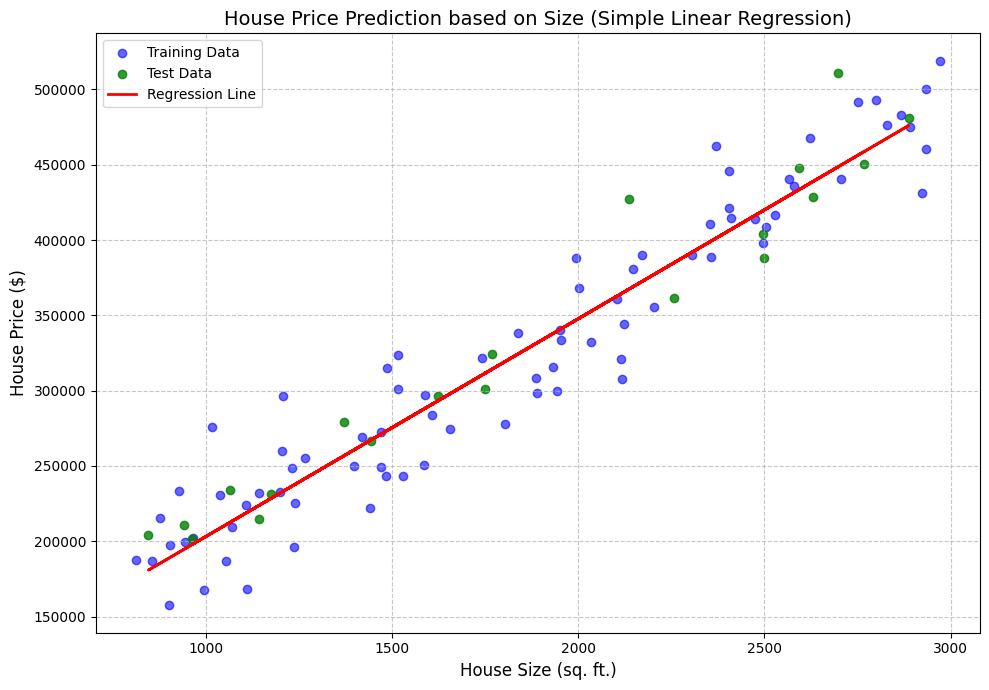


Predicted price for a 1800 sq. ft. house: $318,814.41


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
# Write your code from here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 1. Generate Synthetic Data (Replace with your actual data loading if available) ---
np.random.seed(42) # for reproducibility

# House sizes in square feet (e.g., from 800 sq ft to 3000 sq ft)
house_size = np.random.uniform(800, 3000, 100).reshape(-1, 1)

# Simulate house prices based on size with some random noise
# Price = (size * price_per_sqft) + base_price + noise
price_per_sqft = 150
base_price = 50000
noise = np.random.normal(0, 30000, 100).reshape(-1, 1)

house_price = (house_size * price_per_sqft) + base_price + noise

# Combine into a DataFrame (optional, but good practice for real data)
df = pd.DataFrame({'Size_sqft': house_size.flatten(), 'Price': house_price.flatten()})

print("Generated synthetic dataset sample:")
print(df.head())
print("\nDataset shape:", df.shape)

# --- 2. Prepare Data (X and y) ---
# X (features) must be 2D, y (target) can be 1D
X = df[['Size_sqft']] # Features (independent variable)
y = df['Price']        # Target (dependent variable)

# --- 3. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

# --- 4. Create and Train the Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

print("\n--- Model Training Complete ---")
print(f"Model Intercept (c): {model.intercept_:.2f}")
print(f"Model Coefficient (m - price per sqft): {model.coef_[0]:.2f}")

# --- 5. Make Predictions on the Test Set ---
y_pred = model.predict(X_test)

# --- 6. Evaluate the Model ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")

# --- 7. Visualize the Results ---
plt.figure(figsize=(10, 7))

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.6)
# Plot test data
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.8)
# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('House Price Prediction based on Size (Simple Linear Regression)', fontsize=14)
plt.xlabel('House Size (sq. ft.)', fontsize=12)
plt.ylabel('House Price ($)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Example Prediction (Optional) ---
new_house_size = np.array([[1800]]) # A new house size for prediction
predicted_price = model.predict(new_house_size)
print(f"\nPredicted price for a {new_house_size[0,0]} sq. ft. house: ${predicted_price[0]:,.2f}")